<a href="https://colab.research.google.com/github/nadavo11/Hyperspectral-Target-detection-Debbies-cube/blob/main/Debbies_Cube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
! pip install spectral


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 5.6 MB/s eta 0:00:00


In [6]:
import imageio
import numpy as np

# Load The Cube

In [7]:
hdr_path = "bimodal.hdr"
import cv2

import spectral.io.envi as envi
from pathlib import Path


header_file = str(hdr_path)
spectral_file = str('bimodal.dat')

numpy_ndarr = envi.open(header_file, spectral_file)

cube = numpy_ndarr.read_bands(range(91))  # select the bands

# Here, cube is an numpy nd-array

print(cube.shape)    # returns (100, 100, 3)


(50, 50, 91)


In [8]:
import spectral as spec

/usr/local/lib/python3.9/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (0, 45, 90)
  Interpolation       :  <default>
  RGB data limits     :
    R: [2998.0, 3651.0]
    G: [2640.0, 3986.0]
    B: [1592.0, 2254.0]

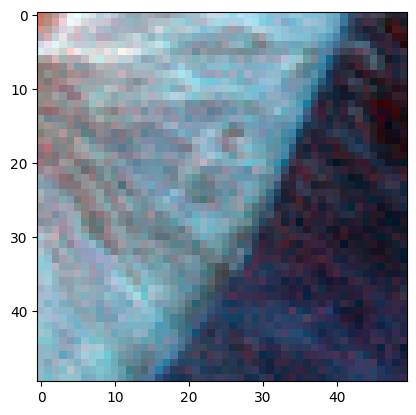

In [9]:
from spectral.graphics.spypylab import imshow
spec.imshow(cube,(0,45,90))

In [10]:
t = cube[5,3,:]
p= 0.1
th = 0.1

# Calculate Cube's Statistics
Let's compute the statistic properties of a given 2D-pixel and its neighbors. We will first calculate the estimator, denoted as $m$, which is an estimation of the cube $x$. The estimator for every pixel is simply the mean of its immediate neighbors. Instead of calculating this directly using loops and addressing edge cases, we can compute this quite easily using convolution.

Let $X$ be a $3\times 3$ matrix of the given 2D-pixel and its neighbors. We can calculate the estimator $m$ as follows:

$m = \frac{1}{8}\sum\limits_{\substack{i=1 \ j=1}}^{3} X_{i,j} - \frac{1}{8} X_{2,2}$




​
 

Here, we convolve $X$ with a $3\times 3$ matrix $k= \frac{1}{8} \times \begin{bmatrix}
1 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1
\end{bmatrix}$

 to obtain what we need. This is beneficial since we no longer have to take into account edge pixels, which have five neighbors, and corner pixels, which have only three neighbors. The only consideration for edges is dividing by the correct number of neighbors. We can accomplish this by using the function build_norm_mat that builds a normalizing matrix of the desired size.

In [46]:
from scipy import signal

def compute_m(cube):
    M = np.zeros(cube.shape)

    # Define kernel for convolution                                         
    kernel = np.array([[1,1,1],
                        [1,0,1],
                        [1,1,1]]) 
    for c in range(M.shape[-1]):

        # Perform 2D convolution with input data and kernel 
        M[:,:,c] = signal.convolve2d(cube[:,:,c], kernel, boundary='wrap', mode='same')/8

    return M

M = compute_m(cube)
print (M.shape)


(50, 50, 91)


(50, 50, 91)


/usr/local/lib/python3.9/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  (0, 1, 2)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-65.125, 412.375]
    G: [100.75, 622.125]
    B: [-178.375, 366.75]

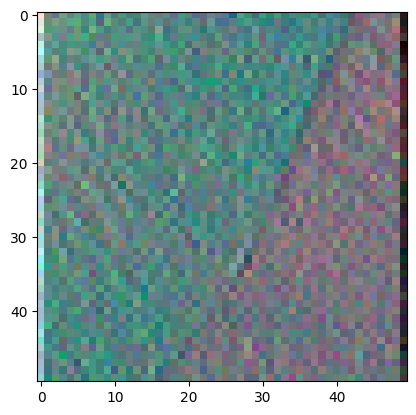

In [47]:

print (M.shape)
spec.imshow(diff_estimator,(0,1,2))

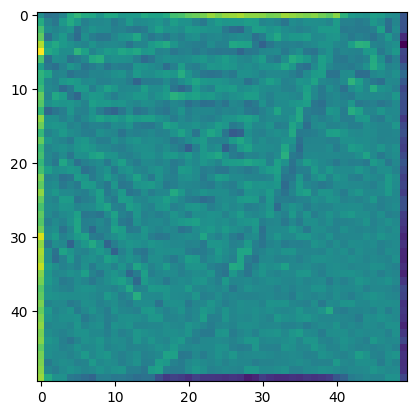

In [50]:
from matplotlib import pyplot as plt
diff_estimator = cube - M
plt.imshow(diff_estimator[:,:,60])